In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

from top_bottom_moseq.orthographic import *
from top_bottom_moseq.util import load_matched_frames, load_intrinsics
from top_bottom_moseq.segmentation import segment_session
from top_bottom_moseq.inpainting import inpaint_session
from top_bottom_moseq.dim_reduction import encode_session
from top_bottom_moseq.qc import save_qc_movie, grab_qc_frame

#### Specify paths

In [2]:
prefix = '/n/groups/datta/caleb/21_2_19_segmentation_redux/tb_jonah/20220823_gmou78/20220823_gmou78'
intrinsics_prefix = '/n/groups/datta/Jonah/public_top_bottom/public_top_bottom/camera_intrinsics'
transforms_path = '/n/groups/datta/caleb/21_2_19_segmentation_redux/tb_jonah/camera_3D_transforms.p'

mouse_segmentation_weights = '/n/groups/datta/caleb/21_2_19_segmentation_redux/public_top_bottom/weights/unet_mouse_v2_IRonly.pt'
occlusion_segmentation_weights = '/n/groups/datta/caleb/21_2_19_segmentation_redux/public_top_bottom/weights/unet_occl_v4.pt'
inpainting_weights = '/n/groups/datta/caleb/21_2_19_segmentation_redux/public_top_bottom/train_inpainting/weights/{}-unet-intermediate.pt'
localization_weights = '/n/groups/datta/caleb/21_2_19_segmentation_redux/public_top_bottom/dim_reduction/weights/localizationNet_temporal.pt'
autoencoder_weights = '/n/groups/datta/caleb/21_2_19_segmentation_redux/public_top_bottom/dim_reduction/weights/autoencoder_temporal.pt'


#### Run pipeline

In [3]:
intrinsics = {name:load_intrinsics(intrinsics_prefix+'.'+name+'.json') for name in ['top','bottom']}
transforms = pickle.load(open(transforms_path,'rb'))

#segment_session(prefix, mouse_segmentation_weights, occlusion_segmentation_weights)  
orthographic_reprojection(prefix, transforms, intrinsics)
inpaint_session(prefix, inpainting_weights)
encode_session(prefix, autoencoder_weights, localization_weights)

getting crop centers: top: 107931it [03:54, 459.59it/s]
getting crop centers: bottom: 107931it [03:55, 457.87it/s]
orthographic reprojection: 107931it [3:09:36,  9.49it/s]
Loading orthographic projections: 8it [03:41, 27.64s/it]
forward/combined pass: 100%|██████████| 107931/107931 [16:03<00:00, 112.07it/s]
Loading inpainted videos: 4it [01:18, 19.52s/it]
alignment and encoding: 100%|██████████| 107931/107931 [16:12<00:00, 110.96it/s]


#### QC: look at frame

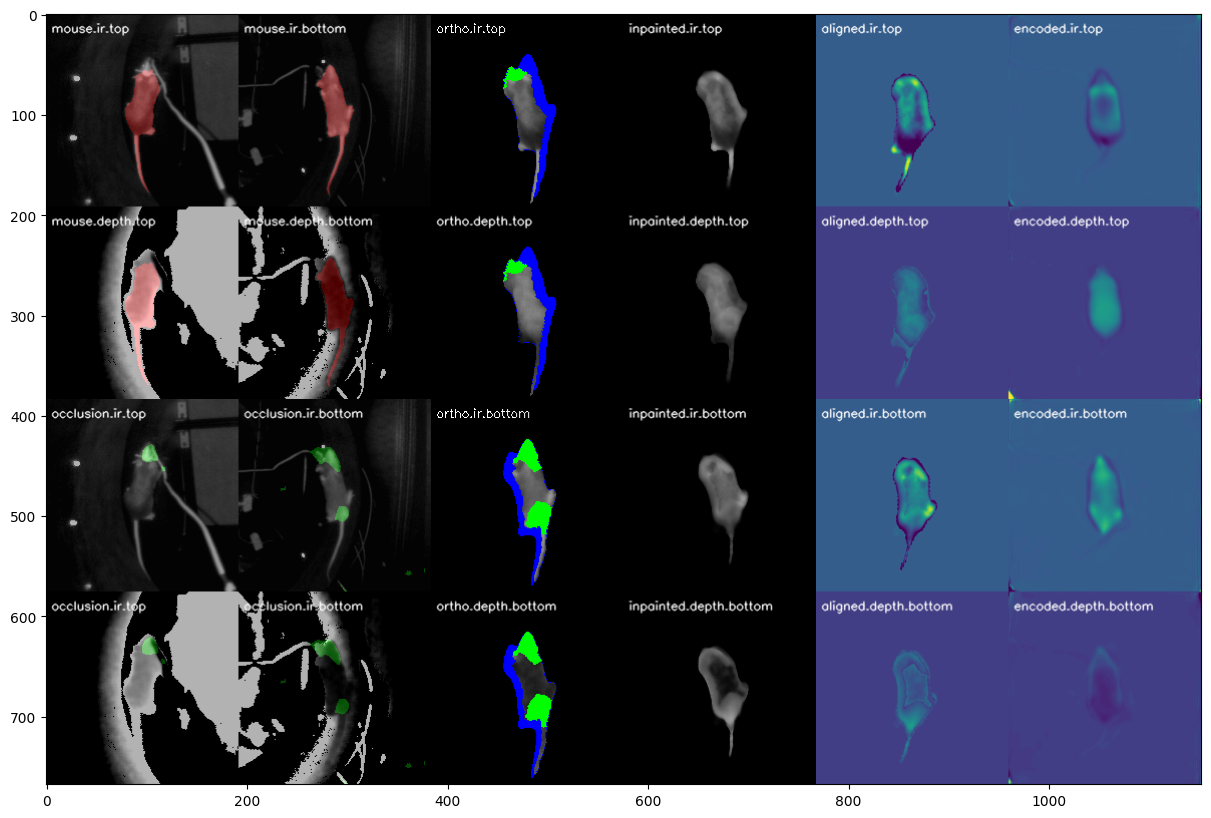

In [4]:
frame_ix = 200 # pick any frame
plt.imshow(grab_qc_frame(prefix, frame_ix))
plt.gcf().set_size_inches((20,10))

#### QC: make video

In [5]:
num_frames = 1000 # choose length
save_qc_movie(prefix, num_frames)

1000it [01:10, 14.25it/s]


QC video written to /n/groups/datta/caleb/21_2_19_segmentation_redux/tb_jonah/20220823_gmou78/20220823_gmou78.QC.mp4
